In [240]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import ast

Strategy:

1. Data importation and cleanse and Evolution of passrate over the time
2. Analysis of passrate by features and subfeatures
4. Analysis of passrate  by user properties

##  1. Data importation and cleanse and Evolution of passrate over the time

### Document report file

In [44]:
doc_report = pd.read_csv('/users/timotheejauffret/desktop/revolut/RawData/doc_reports.csv')
doc_report.drop(columns=doc_report.columns[0], axis=1, inplace=True)

In [45]:
doc_report.head(3)

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear


In [46]:
doc_report.shape

(176404, 18)

In [409]:
#We eliminate duplicate in case of
doc_report.drop_duplicates(keep=False,inplace=True)
doc_report.shape

(176404, 18)

There is no values duplicated

In [47]:
#Let's look at the type of data in each columns before proceding
print(doc_report.dtypes)

user_id                               object
result                                object
visual_authenticity_result            object
image_integrity_result                object
face_detection_result                 object
image_quality_result                  object
created_at                            object
supported_document_result             object
conclusive_document_quality_result    object
colour_picture_result                 object
data_validation_result                object
data_consistency_result               object
data_comparison_result                object
attempt_id                            object
police_record_result                  object
compromised_document_result           object
properties                            object
sub_result                            object
dtype: object


Created_at is an object. We will transform the colum to get a Date format

In [49]:
doc_report[['created_date','created_time']]=doc_report['created_at'].str.split('T', expand=True)
doc_report.drop(['created_at','created_time'], axis=1, inplace=True)

In [50]:
# Formating dates
doc_report['created_date'] = pd.to_datetime(doc_report['created_date'])

### Evolution of the passrate over the time

In [51]:
doc_report_simplified = doc_report[['created_date','result']]

In [52]:
doc_report_simplified.head()

,created_date,result
0,2017-06-20,consider
1,2017-06-20,clear
2,2017-06-20,clear
3,2017-06-20,clear
4,2017-06-20,clear


In [53]:
doc_report_pivot=doc_report_simplified.set_index('created_date').stack().str.get_dummies().sum(level=0)
doc_report_pivot.head()

,clear,consider
created_date,,
2017-06-20,173,10
2017-06-19,181,7
2017-06-18,129,5
2017-06-17,146,3
2017-06-16,138,6


Text(0.5, 0, 'Date')

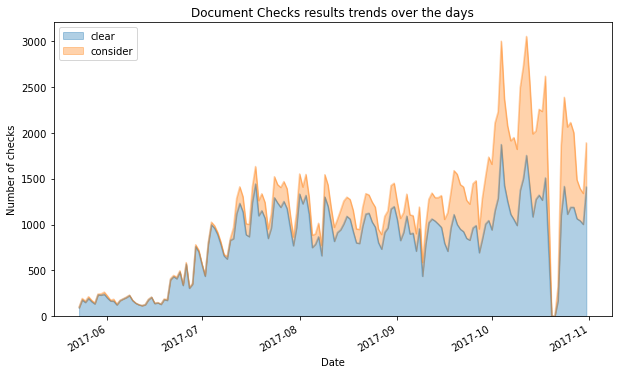

In [54]:
ax = doc_report_pivot.plot(kind='area', alpha=0.35, figsize=(10, 6))

ax.set_title('Document Checks results trends over the days')
ax.set_ylabel('Number of checks')
ax.set_xlabel('Date')

### Analysis of subresults

In [123]:
doc_report_subresult = doc_report[['created_date','sub_result']]

In [124]:
doc_report_subresult_pivot=doc_report_subresult.set_index('created_date').stack().str.get_dummies().sum(level=0)

Text(0.5, 0, 'Date')

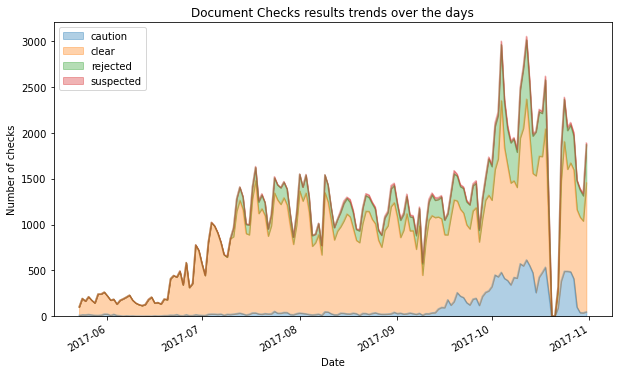

In [125]:
ax = doc_report_subresult_pivot.plot(kind='area', alpha=0.35, figsize=(10, 6))

ax.set_title('Document Checks results trends over the days')
ax.set_ylabel('Number of checks')
ax.set_xlabel('Date')

In [55]:
doc_report_pivot.to_csv('/users/timotheejauffret/desktop/revolut/Analyzed_data/doc_reports_sintesis.csv')

### Facial similarity file

In [56]:
facial_simil = pd.read_csv('/users/timotheejauffret/desktop/revolut/RawData/facial_similarity_reports.csv')

In [57]:
facial_simil.drop(['Unnamed: 0'], axis=1, inplace=True)

In [59]:
facial_simil.shape

(176404, 8)

In [410]:
facial_simil.drop_duplicates(keep=False,inplace=True)
facial_simil.shape

(176404, 8)

There is no duplicated values

In [60]:
facial_simil[['created_date','created_time']]=facial_simil['created_at'].str.split('T', expand=True)
facial_simil.drop(['created_at','created_time'], axis=1, inplace=True)

In [61]:
facial_simil['created_date'] = pd.to_datetime(facial_simil['created_date'])

In [62]:
facial_simil_simplified = facial_simil[['created_date','result']]

In [63]:
facial_simil_pivot=facial_simil_simplified.set_index('created_date').stack().str.get_dummies().sum(level=0)
facial_simil_pivot.head()

,clear,consider
created_date,,
2017-06-20,178,5
2017-06-19,183,5
2017-06-18,133,1
2017-06-17,148,1
2017-06-16,137,7


Text(0.5, 0, 'Date')

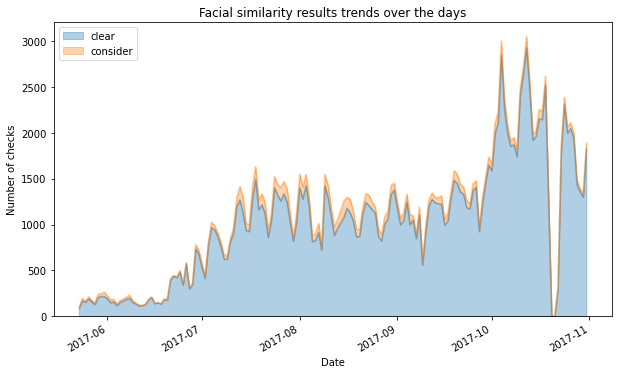

In [64]:
ax = facial_simil_pivot.plot(kind='area', alpha=0.35, figsize=(10, 6))

ax.set_title('Facial similarity results trends over the days')
ax.set_ylabel('Number of checks')
ax.set_xlabel('Date')

##  2. Analysis of passrate by features and subfeatures

### Full Results

We will check if we have any of the checked element that is more trendly to generate consideration than other. We will replace clear by 1 and consider by 0 in order to describe the table.

In [72]:
doc_report_analysed = doc_report.replace(['clear','consider'],[1,0])

In [73]:
doc_report_analysed.dtypes

user_id                                       object
result                                         int64
visual_authenticity_result                   float64
image_integrity_result                       float64
face_detection_result                        float64
image_quality_result                          object
supported_document_result                     object
conclusive_document_quality_result           float64
colour_picture_result                        float64
data_validation_result                       float64
data_consistency_result                      float64
data_comparison_result                       float64
attempt_id                                    object
police_record_result                         float64
compromised_document_result                  float64
properties                                    object
sub_result                                    object
created_date                          datetime64[ns]
dtype: object

image_quality_result and supported_document_result are still object next cleaning the data. Let's understand why and resolve it in order to have all results columns with the same format. 

In [ ]:
doc_report_analysed[doc_report_analysed['image_quality_result']=='unidentified']

In [68]:
doc_report_analysed['image_quality_result'].unique()

array([1, 'unidentified', nan], dtype=object)

In [69]:
doc_report_analysed['supported_document_result'].unique()

array([1, nan, 'unidentified'], dtype=object)

In [74]:
doc_report_analysed = doc_report_analysed.replace(['unidentified'],[0])

In [75]:
doc_report_analysed.dtypes

user_id                                       object
result                                         int64
visual_authenticity_result                   float64
image_integrity_result                       float64
face_detection_result                        float64
image_quality_result                         float64
supported_document_result                    float64
conclusive_document_quality_result           float64
colour_picture_result                        float64
data_validation_result                       float64
data_consistency_result                      float64
data_comparison_result                       float64
attempt_id                                    object
police_record_result                         float64
compromised_document_result                  float64
properties                                    object
sub_result                                    object
created_date                          datetime64[ns]
dtype: object

In [130]:
feature_analisis = doc_report_analysed.describe()

In [132]:
feature_analisis.head(2)

,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result
count,176404.000000,150290.000000,176403.000000,150261.00000,176403.000000,175900.000000,95217.000000,95222.000000,142974.000000,92229.000000,2548.000000,144557.000000,45506.000000
mean,0.750561,0.979839,0.774703,0.99618,0.861663,0.990409,0.857536,0.998908,0.988536,0.998157,0.936421,0.999827,0.999495


In [165]:
feature_analisis_T= feature_analisis.head(2).transpose()

In [166]:
feature_analisis_T.rename(columns={'count':'Events','mean':'Event pass rate'}, inplace=True)

In [167]:
feature_analisis_T['Number of clear results']=feature_analisis_T['Events']*feature_analisis_T['Event pass rate']

In [168]:
feature_analisis_T  = feature_analisis_T.sort_values('Event pass rate')

In [169]:
feature_analisis_T.index.names = ['Feature']

Let's look at results by main features first

In [177]:
main_features = ['police_record_result','data_comparison_result','data_consistency_result','data_validation_result','visual_authenticity_result','image_integrity_result','compromised_document_result']

In [178]:
feature_analisis_T[feature_analisis_T.index.isin(main_features)]

,Events,Event pass rate,Number of clear results
Feature,,,
image_integrity_result,176403.0,0.774703,136660.0
data_comparison_result,2548.0,0.936421,2386.0
visual_authenticity_result,150290.0,0.979839,147260.0
data_validation_result,142974.0,0.988536,141335.0
data_consistency_result,92229.0,0.998157,92059.0
compromised_document_result,45506.0,0.999495,45483.0
police_record_result,144557.0,0.999827,144532.0


We will separate features analisis for "Caution" sub Results and "Rejected" subresults

### Parcial Results - "Rejected"

In [156]:
feature_analisis_Rejected = doc_report_analysed[doc_report_analysed['sub_result']=='rejected'].describe()
feature_analisis_Rejected_T= feature_analisis_Rejected.head(2).transpose()

In [157]:
feature_analisis_Rejected_T.rename(columns={'count':'Events','mean':'Event pass rate'}, inplace=True)
feature_analisis_Rejected_T['Number of clear results']=feature_analisis_Rejected_T['Events']*feature_analisis_Rejected_T['Event pass rate']
feature_analisis_Rejected_T  = feature_analisis_Rejected_T.sort_values('Event pass rate')
feature_analisis_Rejected_T.index.names = ['Feature']

In [179]:
feature_analisis_Rejected_T
feature_analisis_Rejected_T[feature_analisis_Rejected_T.index.isin(main_features)]

,Events,Event pass rate,Number of clear results
Feature,,,
image_integrity_result,26090.0,0.000000,0.0
data_validation_result,3.0,0.666667,2.0
compromised_document_result,3.0,1.000000,3.0
visual_authenticity_result,0.0,NaN,NaN
data_consistency_result,0.0,NaN,NaN
data_comparison_result,0.0,NaN,NaN
police_record_result,0.0,NaN,NaN


We see that the main reason is coming from image_integrity, let's see sub-features results opening by breakdown

In [188]:
breakdown_rejected = ['supported_document_result','image_quality_result','colour_picture_result','conclusive_document_quality_result']
feature_analisis_Rejected_T[feature_analisis_Rejected_T.index.isin(breakdown_rejected)].sort_values('Event pass rate')

,Events,Event pass rate,Number of clear results
Feature,,,
image_quality_result,26090.0,0.064661,1687.0
supported_document_result,25589.0,0.934073,23902.0
conclusive_document_quality_result,0.0,NaN,NaN
colour_picture_result,0.0,NaN,NaN


### Parcial Results - "caution"

In [159]:
feature_analisis_Caution = doc_report_analysed[doc_report_analysed['sub_result']=='caution'].describe()
feature_analisis_Caution_T= feature_analisis_Caution.head(2).transpose()

In [160]:
feature_analisis_Caution_T.rename(columns={'count':'Events','mean':'Event pass rate'}, inplace=True)
feature_analisis_Caution_T['Number of clear results']=feature_analisis_Caution_T['Events']*feature_analisis_Caution_T['Event pass rate']
feature_analisis_Caution_T  = feature_analisis_Caution_T.sort_values('Event pass rate')
feature_analisis_Caution_T.index.names = ['Feature']

In [193]:
feature_analisis_Caution_T_main = feature_analisis_Caution_T[feature_analisis_Caution_T.index.isin(main_features)]
feature_analisis_Caution_T_main

,Events,Event pass rate,Number of clear results
Feature,,,
image_integrity_result,15992.0,0.159705,2554.0
data_comparison_result,196.0,0.173469,34.0
visual_authenticity_result,15970.0,0.909956,14532.0
data_validation_result,15584.0,0.922164,14371.0
data_consistency_result,9858.0,1.000000,9858.0
police_record_result,15589.0,1.000000,15589.0
compromised_document_result,10462.0,1.000000,10462.0


The number of of data_comparison_results is so low that we can unconsider it even if the pass rate of the event is low.
We can consider 3 main features with poor performance
 - image_integrity
 - visual_authenticity
 - data_validation
 
Visual authenticity only have a subfeature which is face detection

In [205]:
breakdown_image_integrity = ['supported_document_result','image_quality_result','colour_picture_result','conclusive_document_quality_result']
breakdown_data_validation = ['gender_result','expiry_date_result','date_of_birth_result','document_numbers_result','mrz_result']

In [206]:
feature_analisis_Caution_T[feature_analisis_Caution_T.index.isin(breakdown_image_integrity)]

,Events,Event pass rate,Number of clear results
Feature,,,
conclusive_document_quality_result,14509.0,0.07740,1123.0
colour_picture_result,14509.0,0.99552,14444.0
image_quality_result,15992.0,1.00000,15992.0
supported_document_result,15992.0,1.00000,15992.0


In [207]:
feature_analisis_Caution_T[feature_analisis_Caution_T.index.isin(breakdown_data_validation)]

,Events,Event pass rate,Number of clear results
Feature,,,


We have missing information in our dataset to have the details on datavalidation results

## 3. Analysis of passrate by user properties

We convert the columns properties into a Json

In [256]:
temp_doc_report = doc_report[['created_date','user_id','result','sub_result','properties']]
temp_doc_report['properties'] = temp_doc_report['properties'].apply(lambda element: ast.literal_eval(element))

<ipython-input-256-e69791ee736a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_doc_report['properties'] = temp_doc_report['properties'].apply(lambda element: ast.literal_eval(element))


In [257]:
temp_prop = pd.json_normalize(temp_doc_report['properties'])

In [259]:
doc_report_properties = pd.concat([temp_doc_report, temp_prop], axis=1)

In [268]:
doc_report_properties= doc_report_properties[['created_date','result','sub_result','issuing_country','document_type']]

In [284]:
doc_report_properties_num = doc_report_properties.replace(['clear','consider'],[1,0])

#### Do we have an issue with a specific document? 

In [311]:
passrate_day = doc_report_properties_num[['created_date','result','issuing_country','document_type']]

In [312]:
avg_passrate_day=passrate_day.groupby(['created_date','document_type']).mean().reset_index()

Let's find the most recurent document to eliminate non relevant information

In [315]:
avg_passrate_day.groupby('document_type').count().sort_values('result')

,created_date,result
document_type,,
birth_certificate,1,1
tax_id,7,7
voter_id,10,10
work_permit,15,15
residence_permit,113,113
passport,159,159
driving_licence,160,160
national_identity_card,160,160


significant document type are: 
- residence_permit
- passport
- driving_licence
- national_identity_card


In [411]:
residence_permit_pr = avg_passrate_day[avg_passrate_day['document_type']=='residence_permit'][['created_date','result']].set_index('created_date').rename(columns={'result':'residence_permit',})
passport_pr = avg_passrate_day[avg_passrate_day['document_type']=='passport'][['created_date','result']].set_index('created_date').rename(columns={'result':'passport',})
driving_licence_pr = avg_passrate_day[avg_passrate_day['document_type']=='driving_licence'][['created_date','result']].set_index('created_date').rename(columns={'result':'driving_licence',})
national_identity_card_pr = avg_passrate_day[avg_passrate_day['document_type']=='national_identity_card'][['created_date','result']].set_index('created_date').rename(columns={'result':'national_identity_card',})



In [324]:
avg_pr_document = pd.concat([residence_permit_pr, passport_pr, driving_licence_pr, national_identity_card_pr], axis=1)

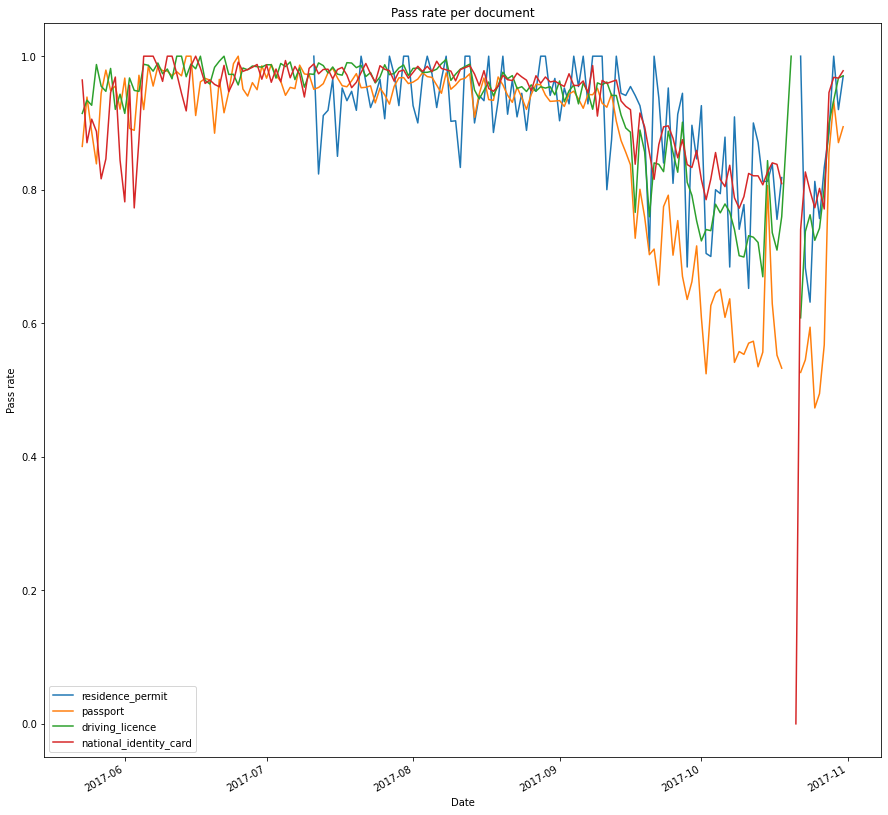

In [407]:
avg_pr_document.plot(kind='line',
             stacked=False,
             figsize=(15, 15)) 

plt.title('Pass rate per document')
plt.ylabel('Pass rate')
plt.xlabel('Date')

plt.show()

We have no trends showing that a specific document is source of the pass rate decrease

### Do we have an issue with a specific country?

In [281]:
users_by_countries = doc_report_properties_num[['result','issuing_country']].groupby('issuing_country').count().sort_values('result')

In [283]:
users_by_countries.describe()

,result
count,168.00000
mean,894.64881
std,3897.55267
min,1.00000
25%,3.00000
50%,13.50000
75%,182.75000
max,39681.00000


We have too many countries to builf a readable plot. We need to filter and get only relevant countries. Let's do a pareto analysis to get countries that represent more than 80% of the attempts

In [328]:
users_by_countries = users_by_countries.sort_values('result', ascending=False)

In [331]:
users_by_countries['cumpercentage'] = users_by_countries['result'].cumsum()/users_by_countries['result'].sum()*100

In [333]:
users_by_countries.head(10)

,result,cumpercentage
issuing_country,,
GBR,39681,26.401022
FRA,23522,42.050951
LTU,12975,50.683628
ESP,9464,56.980326
IRL,9232,63.122667
POL,9110,69.183838
PRT,5514,72.852476
ITA,4758,76.018124
DEU,4388,78.937599


The first 10 countries represent more than 80% of users. We would look at the trends for those countries to see if one of them is responsible for the pass rate decrease

In [387]:
countries_filtered = users_by_countries.head(10).index
countries_filtered

Index(['GBR', 'FRA', 'LTU', 'ESP', 'IRL', 'POL', 'PRT', 'ITA', 'DEU', 'GRC'], dtype='object', name='issuing_country')

In [341]:
avg_country=passrate_day.groupby(['created_date','issuing_country']).mean().reset_index()

In [352]:
avg_country

,created_date,issuing_country,result
0,2017-05-23,AUS,1.000000
1,2017-05-23,CHN,1.000000
2,2017-05-23,DEU,1.000000
3,2017-05-23,ESP,1.000000
4,2017-05-23,FRA,0.714286
...,...,...,...
7773,2017-10-31,TGO,1.000000
7774,2017-10-31,TUR,1.000000
7775,2017-10-31,TWN,0.500000
7776,2017-10-31,USA,1.000000


In [380]:
avg_per_country = pd.DataFrame()

for country in countries_filtered:
    exec('{} = avg_country[avg_country["issuing_country"] == country][["created_date","result"]].set_index("created_date")'.format(country))
    


In [395]:
GBR = GBR.rename(columns={'result':'GBR'})
FRA = FRA.rename(columns={'result':'FRA'})
LTU = LTU.rename(columns={'result':'LTU'})
ESP = ESP.rename(columns={'result':'ESP'})
IRL = IRL.rename(columns={'result':'IRL'})
POL = POL.rename(columns={'result':'POL'})
PRT = PRT.rename(columns={'result':'PRT'})
ITA = ITA.rename(columns={'result':'ITA'})
DEU = DEU.rename(columns={'result':'DEU'})
GRC = GRC.rename(columns={'result':'GRC'})


In [396]:
avg_per_country=pd.concat([GBR, FRA, LTU, ESP, IRL, POL, PRT, ITA, DEU, GRC], axis=1)

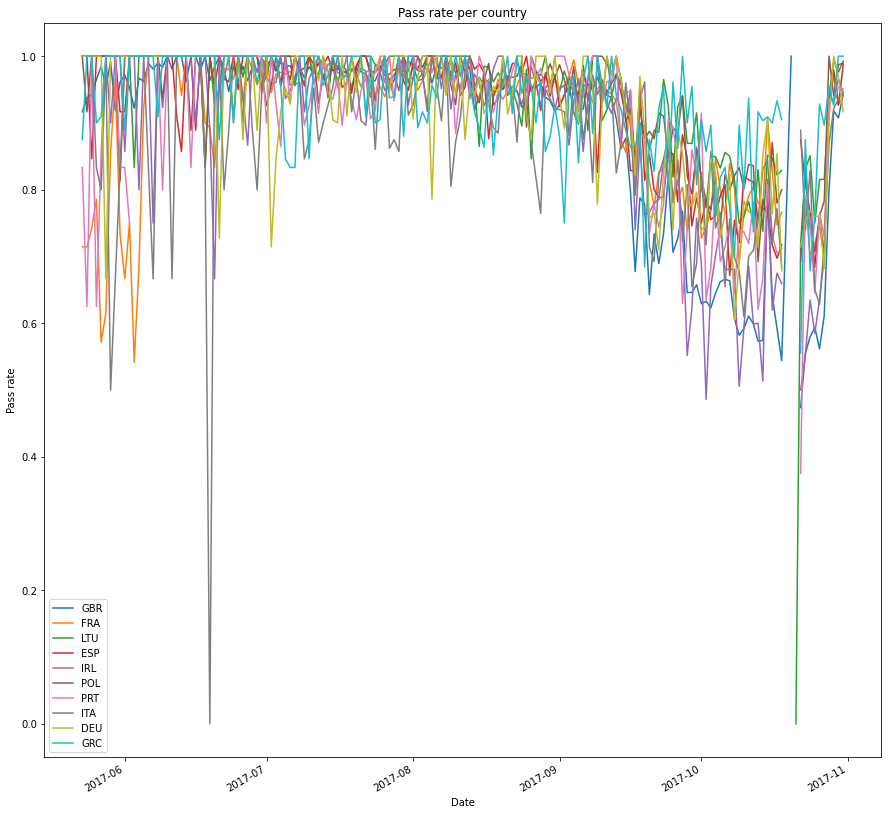

In [408]:
avg_per_country.plot(kind='line',
             stacked=False,
             figsize=(15, 15)
                  ) 

plt.title('Pass rate per country')
plt.ylabel('Pass rate')
plt.xlabel('Date')

plt.show()

We have no data showing that a specific country has more issue than other